In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('Algerian_forest_fires.csv',header=1)
data


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [9]:
dataset = data.to_dict(orient = 'records')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [11]:
data[data.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [12]:
data.loc[:122,'Region'] = 1
data.loc[122:,'Region'] = 2
data[['Region']] = data[['Region']].astype(int)
data[121:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,1
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [13]:
data.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [14]:
data = data.dropna().reset_index(drop = True)

In [15]:
data.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [16]:
data = data.drop(122).reset_index(drop = True)
data.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2


In [17]:
data[121:] #NULL and UNWANTED ROWS are removed 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,1
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [18]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [19]:
data.columns = data.columns.str.strip()
data.columns #Unwanted spacing in column names is removed

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [20]:
data[['day','month','year','Temperature','RH','Ws']] = data[['day','month','year','Temperature','RH','Ws']].astype(int)

In [21]:
data[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']] = data[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [23]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,2.000000


In [24]:
data.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [25]:
data.Classes = data.Classes.str.strip()
data.Classes.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [26]:
data[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


In [27]:
data[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [28]:
data.to_csv('Algerian_forest_fires_updated.csv',index = False)

In [29]:
col = [feature for feature in data if feature not in data[['day','month','year']]]
col


['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes',
 'Region']

In [30]:
data1 = data[col]
data1

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [31]:
data1['Classes'] = np.where(data1['Classes'] == 'not fire',0,1)
data1


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2


<Axes: xlabel='Temperature', ylabel='Count'>

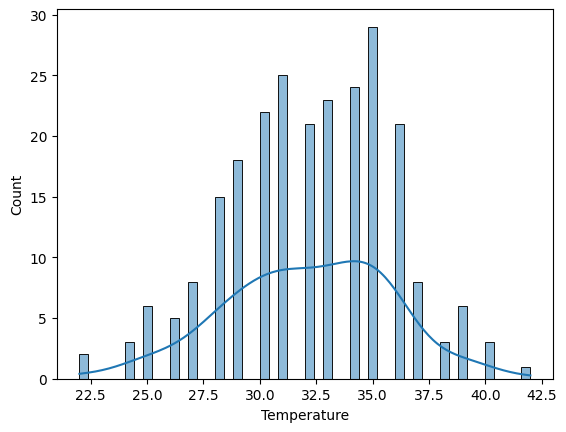

In [32]:
sns.histplot(data = data1['Temperature'] , bins = 50 , kde = True)

In [33]:
percentage = data.Classes.value_counts(normalize=True)*100
percentage

Classes
fire        56.378601
not fire    43.621399
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Pie Chart of Classes')

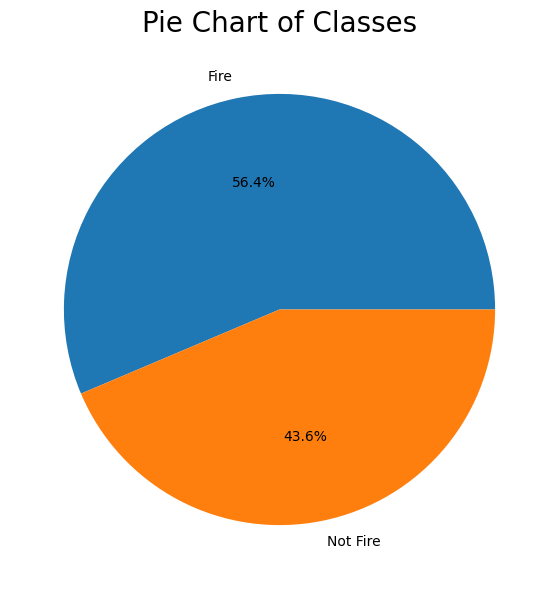

In [34]:
plt.figure(figsize = (12,7))
plt.pie(percentage,labels = ['Fire','Not Fire'],autopct='%1.1f%%')
plt.title('Pie Chart of Classes',fontsize = 20)

In [35]:
temp = data1['Temperature'].unique()

In [36]:
temp_dist = data.Temperature.value_counts(normalize=True)*100
temp_dist

Temperature
35    11.934156
31    10.288066
34     9.876543
33     9.465021
30     9.053498
32     8.641975
36     8.641975
29     7.407407
28     6.172840
27     3.292181
37     3.292181
25     2.469136
39     2.469136
26     2.057613
24     1.234568
38     1.234568
40     1.234568
22     0.823045
42     0.411523
Name: proportion, dtype: float64

<Axes: >

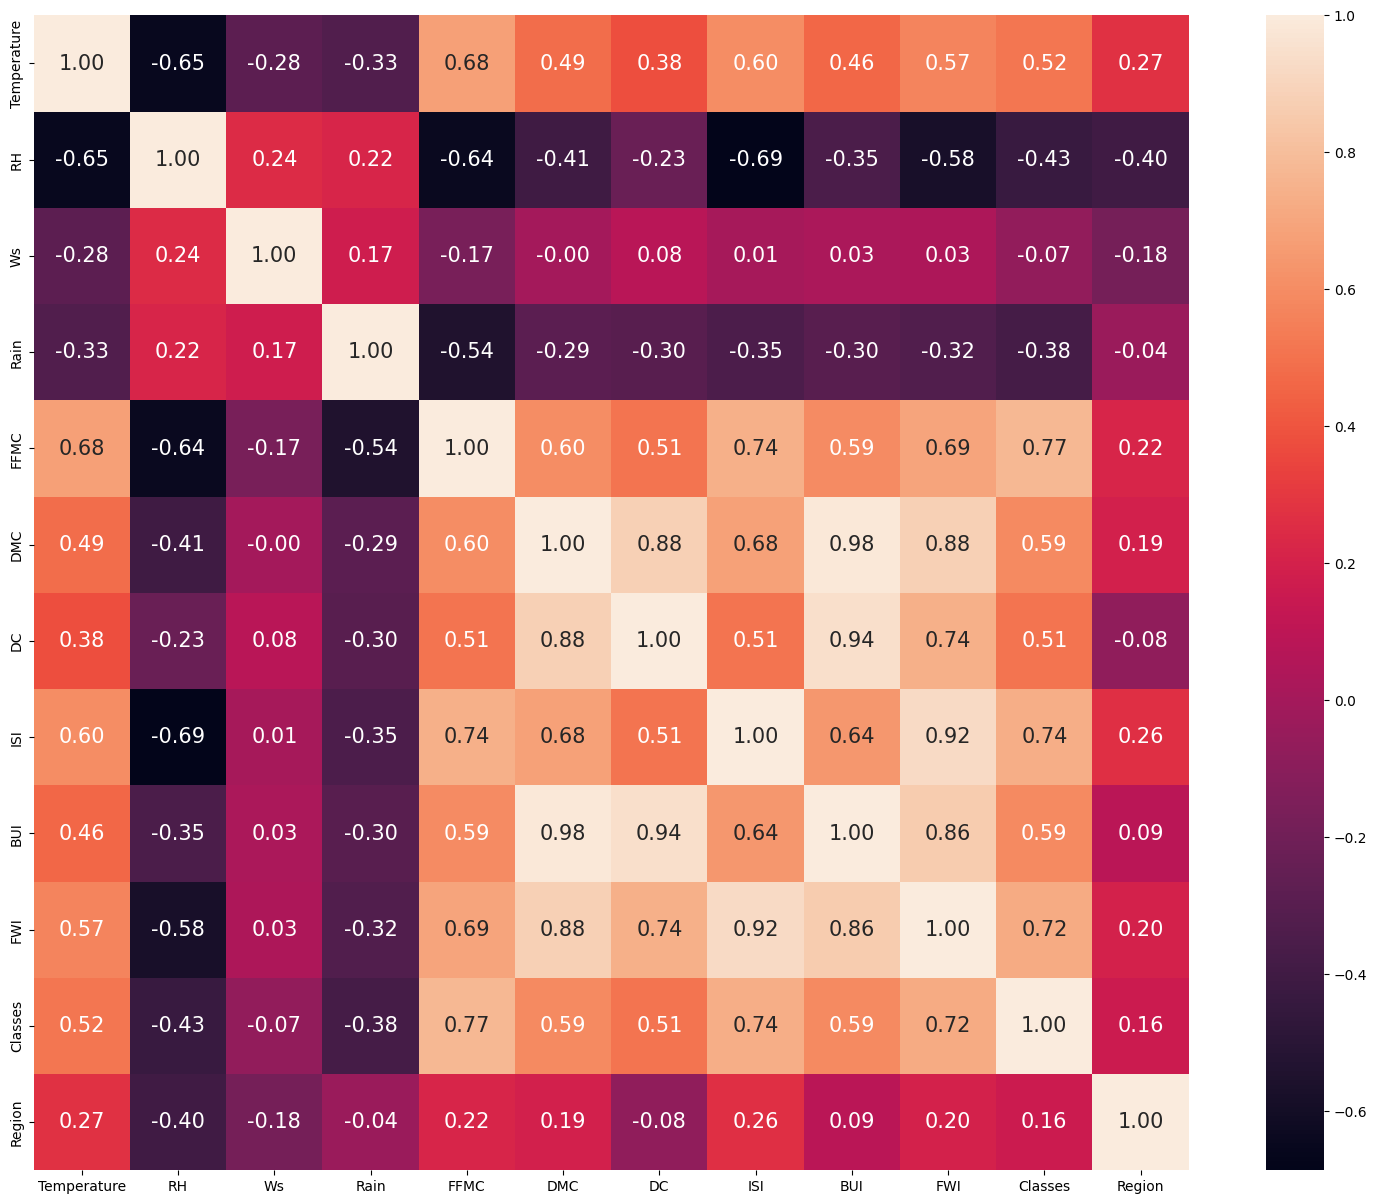

In [37]:
plt.figure(figsize=(20,15))
sns.heatmap(data1.corr() , annot = True , square = True , fmt = '.2f' , annot_kws={'size':15})


<Axes: xlabel='FWI'>

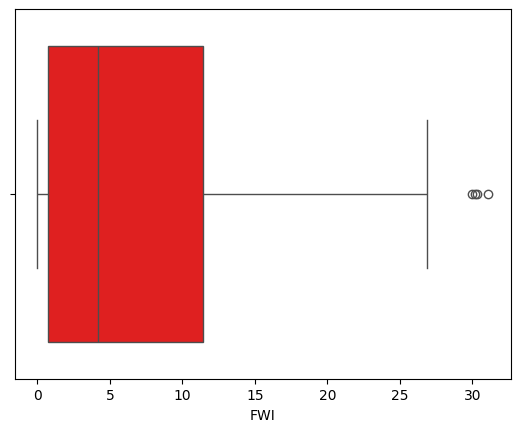

In [38]:
sns.boxplot(data1['FWI'] , color = 'red',orient = 'h')

In [39]:
data.month.unique()

array([6, 7, 8, 9])

In [40]:
data.month.value_counts()

month
8    62
7    61
6    60
9    60
Name: count, dtype: int64

In [41]:
data_region1 = data.loc[data['Region'] == 1]
data_region2 = data.loc[data['Region'] == 2]

([<matplotlib.axis.XTick at 0x1fab90cdf70>,
 [Text(0, 0, 'JUNE'),
  Text(1, 0, 'JULY'),
  Text(2, 0, 'AUGUST'),
  Text(3, 0, 'SEPTEMBER')])

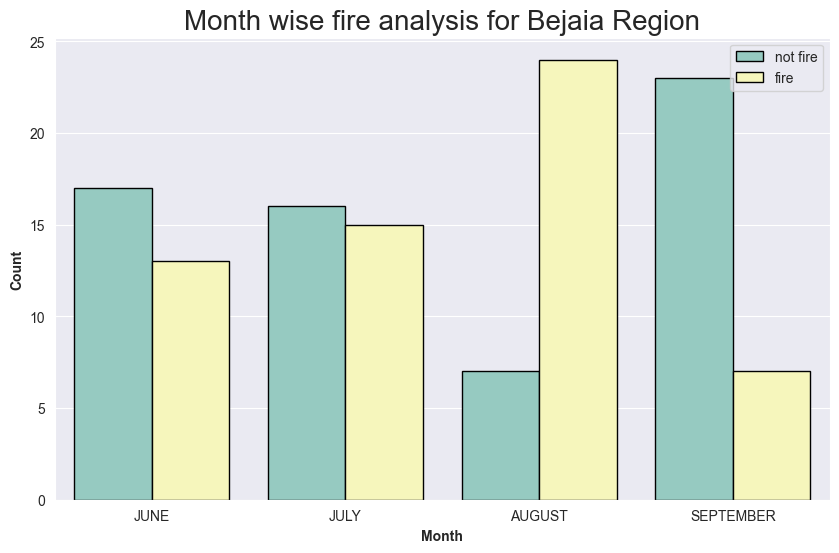

In [42]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.countplot(data = data_region1 , x = 'month' , hue = 'Classes' , ec = 'black', palette = 'Set3')
plt.title('Month wise fire analysis for Bejaia Region',fontsize = 20)
plt.xlabel('Month' , weight = 'bold')
plt.ylabel('Count' , weight = 'bold')
plt.legend(loc = 'upper right')
plt.xticks(np.arange(4),['JUNE','JULY','AUGUST','SEPTEMBER'])

([<matplotlib.axis.XTick at 0x1fab9118a10>,
 [Text(0, 0, 'JUNE'),
  Text(1, 0, 'JULY'),
  Text(2, 0, 'AUGUST'),
  Text(3, 0, 'SEPTEMBER')])

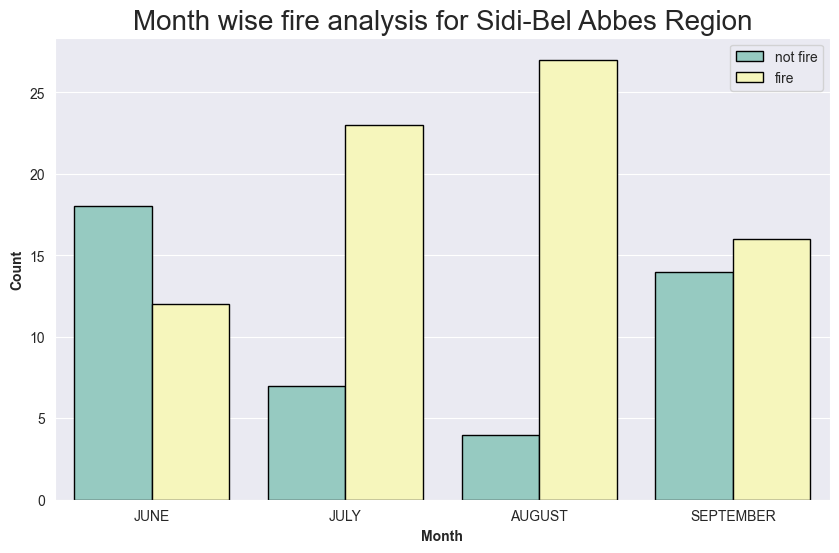

In [43]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.countplot(data = data_region2 , x = 'month' , hue = 'Classes' , ec = 'black', palette = 'Set3')
plt.title('Month wise fire analysis for Sidi-Bel Abbes Region',fontsize = 20)
plt.xlabel('Month' , weight = 'bold')
plt.ylabel('Count' , weight = 'bold')
plt.legend(loc = 'upper right')
plt.xticks(np.arange(4),['JUNE','JULY','AUGUST','SEPTEMBER'])

In [44]:
def barchart(feature,xlabel):
    plt.figure(figsize=(15,7))
    by_feature = data1.groupby([feature],as_index=False)['Classes'].sum()
    ax = sns.barplot(x = feature , y = 'Classes' , data = by_feature , estimator=sum)
    ax.set(xlabel = xlabel , ylabel = "Fire Count")

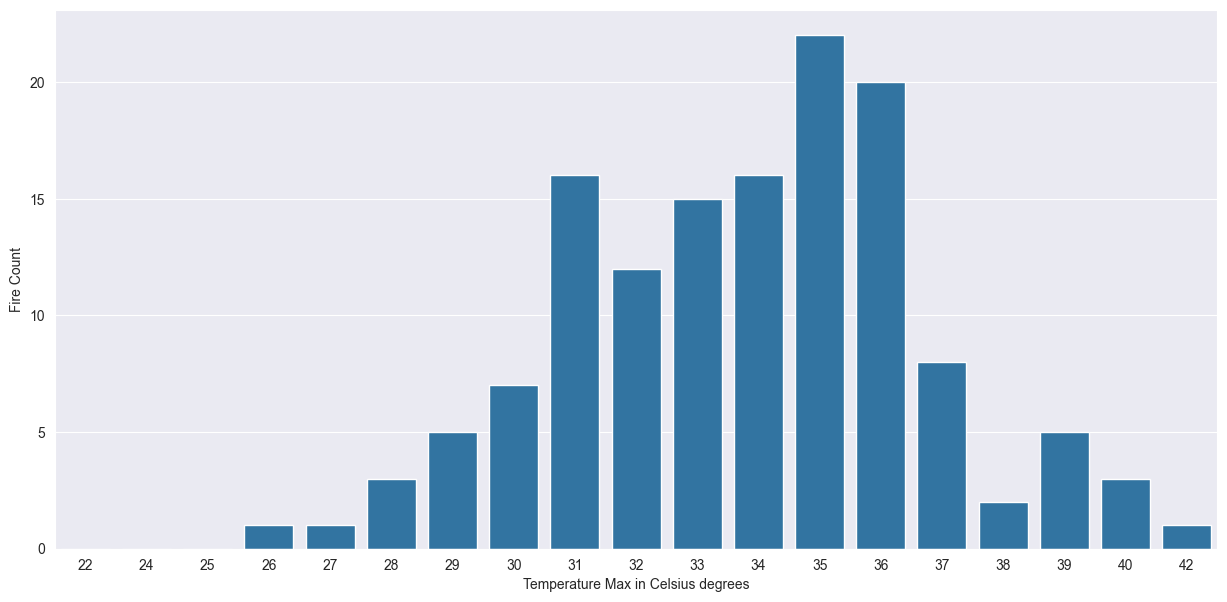

In [45]:
barchart('Temperature' , 'Temperature Max in Celsius degrees')

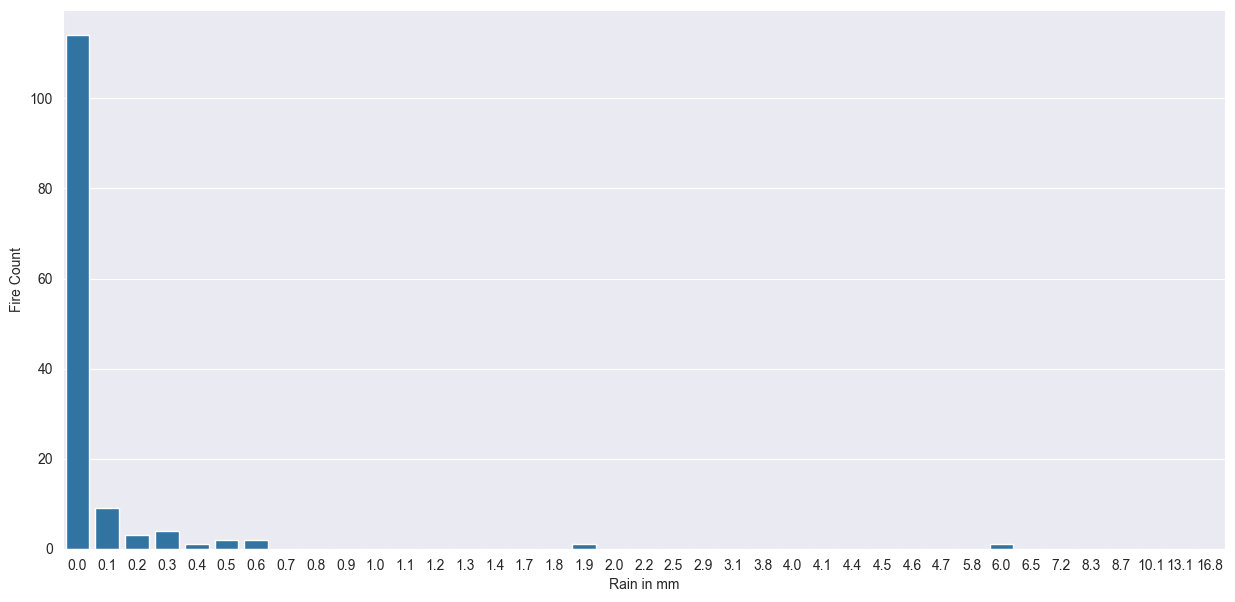

In [46]:
barchart('Rain' , 'Rain in mm')

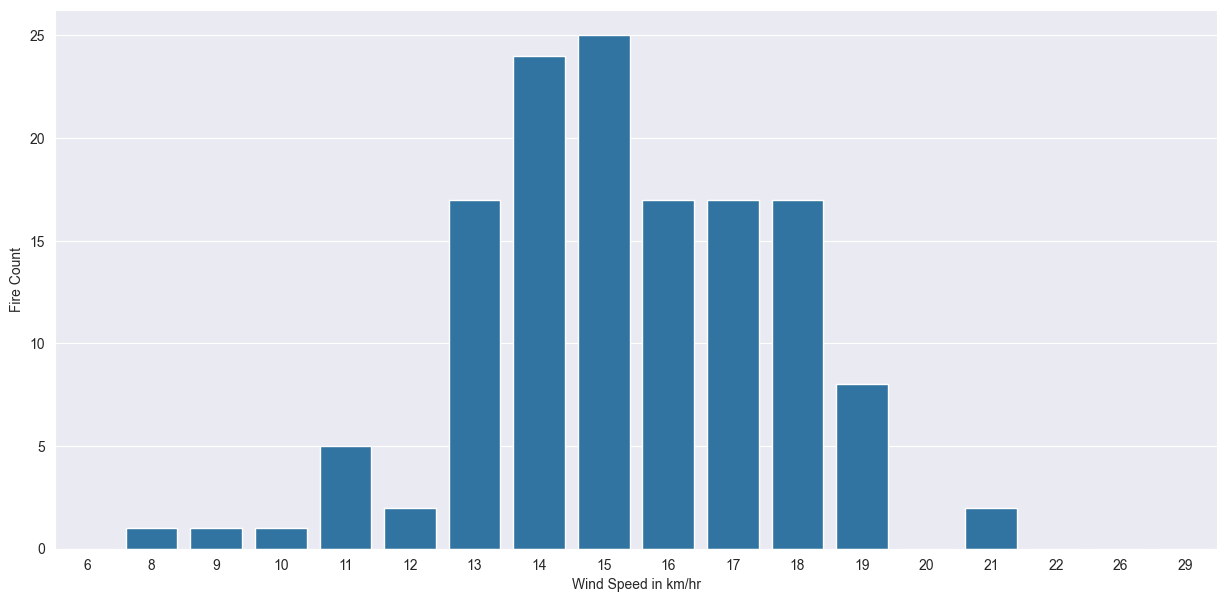

In [47]:
barchart('Ws' , 'Wind Speed in km/hr')

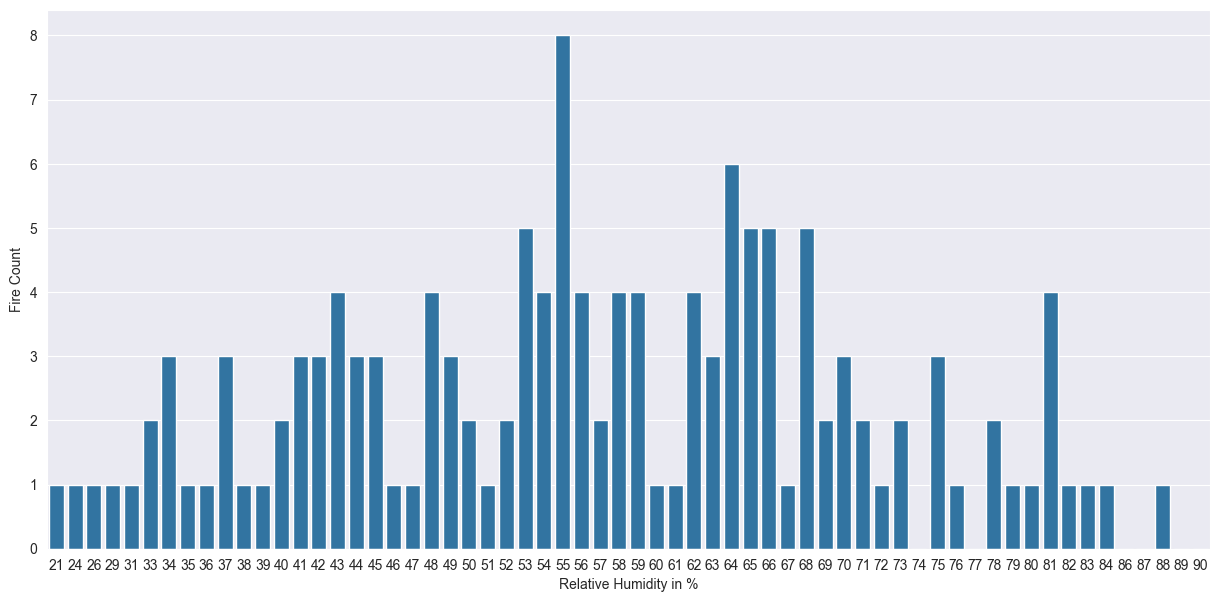

In [48]:
barchart('RH' , 'Relative Humidity in %')

In [49]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [50]:
data2 = data1.drop(['Temperature','RH','Ws','Rain','Region'],axis = 1)
data2

,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,64.4,4.1,7.6,1.0,3.9,0.4,0
2,47.1,2.5,7.1,0.3,2.7,0.1,0
3,28.6,1.3,6.9,0.0,1.7,0.0,0
4,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...
238,85.4,16.0,44.5,4.5,16.9,6.5,1
239,41.1,6.5,8.0,0.1,6.2,0.0,0
240,45.9,3.5,7.9,0.4,3.4,0.2,0
241,79.7,4.3,15.2,1.7,5.1,0.7,0


In [51]:
data2_col = list(data2.columns)
data2_col

['FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [52]:
def histchart(feature,xlabel):
    data2 = data1.drop(['Temperature','RH','Ws','Rain','Region'],axis = 1)
    sns.histplot(data = data2 , x = feature , hue = 'Classes' , kde = True)
    plt.legend(labels = ['Fire','Not fire'])
    plt.title(feature)
    plt.xlabel(xlabel)

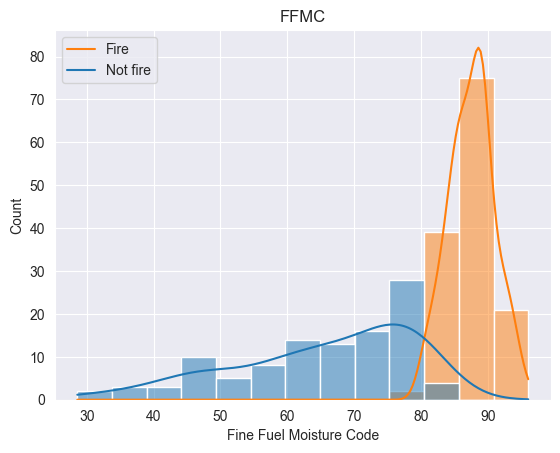

In [53]:
histchart('FFMC','Fine Fuel Moisture Code')

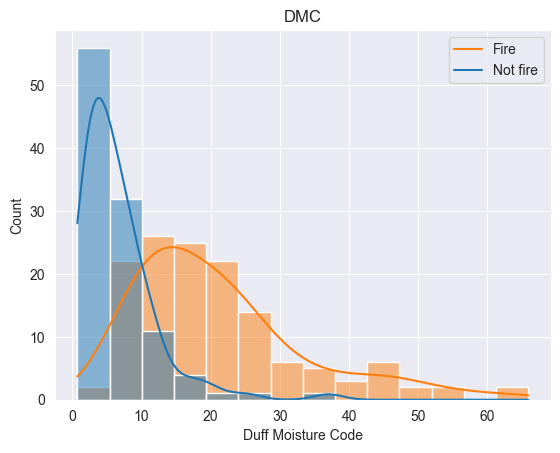

In [54]:
histchart('DMC','Duff Moisture Code')

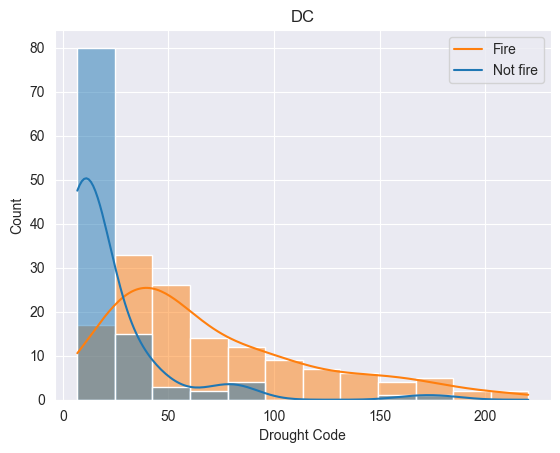

In [55]:
histchart('DC' , 'Drought Code')

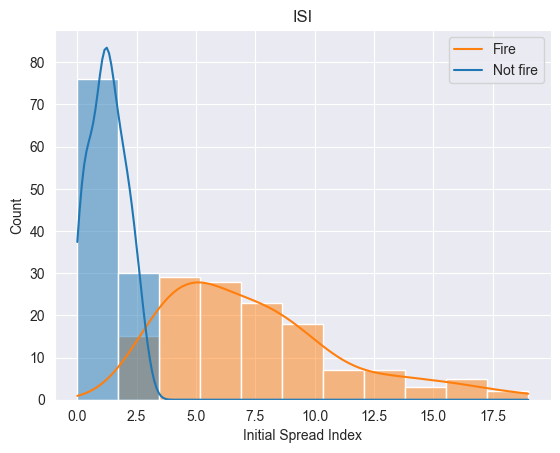

In [56]:
histchart('ISI', 'Initial Spread Index')

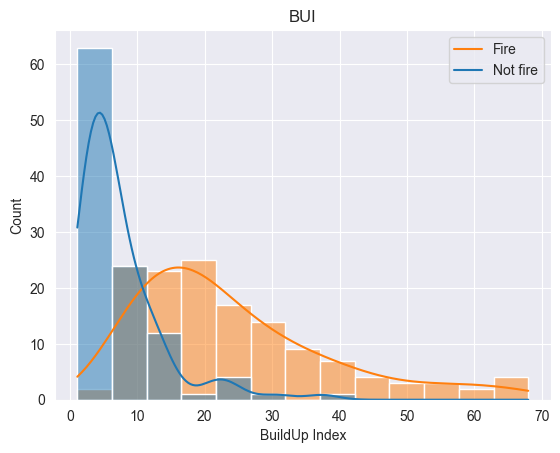

In [57]:
histchart('BUI' , 'BuildUp Index')

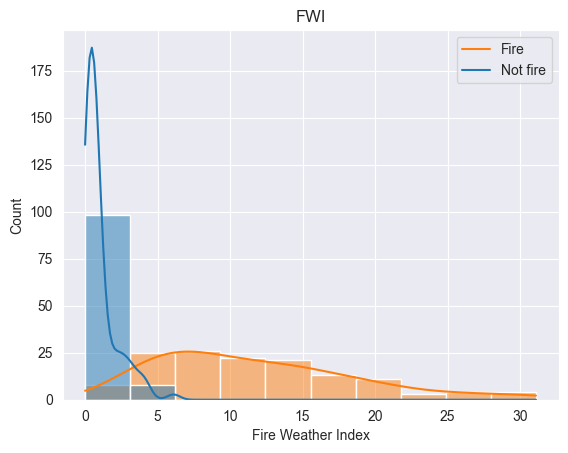

In [58]:
histchart('FWI' , 'Fire Weather Index')

In [59]:
data1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


<Axes: >

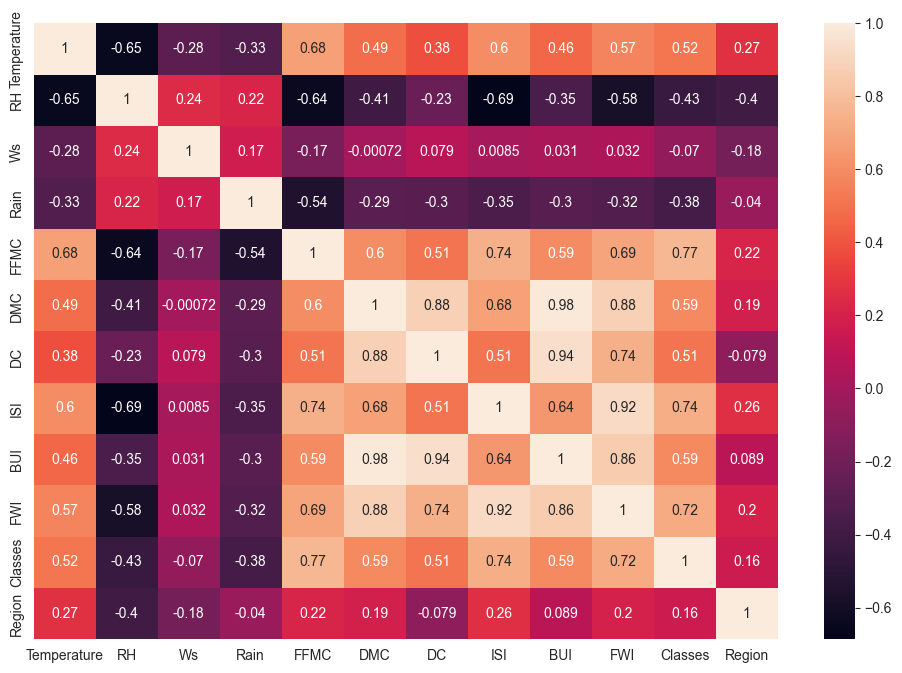

In [60]:
plt.figure(figsize = (12,8))
sns.heatmap(data1.corr(),annot = True)

In [61]:
X = data1.drop('FWI',axis=1)
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,2


In [62]:
y = data1['FWI']
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((182, 11), (61, 11), (182,), (61,))

<Axes: >

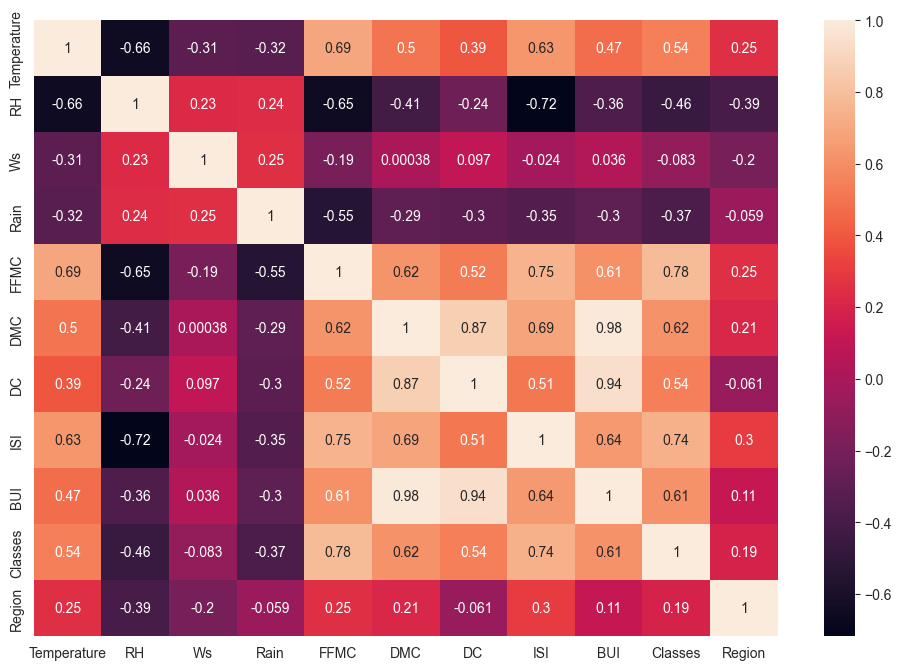

In [64]:
plt.figure(figsize = (12,8))
sns.heatmap(X_train.corr(),annot = True)

In [65]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [66]:
features_to_drop = correlation(X_train,0.85)
features_to_drop

{'BUI', 'DC'}

In [67]:
X_train.drop(features_to_drop , axis = 1 , inplace = True)
X_test.drop(features_to_drop , axis = 1 , inplace = True)
X_train.shape , X_test.shape

((182, 9), (61, 9))

In [68]:
X_test,X_train

(     Temperature  RH  Ws  Rain  FFMC   DMC  ISI  Classes  Region
 24            31  64  15   0.0  86.7  14.2  5.7        1       1
 6             33  54  13   0.0  88.2   9.9  6.4        1       1
 152           28  58  18   2.2  63.7   3.2  1.2        0       2
 232           34  58  13   0.2  79.5  18.7  2.1        0       2
 238           30  65  14   0.0  85.4  16.0  4.5        1       2
 ..           ...  ..  ..   ...   ...   ...  ...      ...     ...
 162           34  56  15   2.9  74.8   7.1  1.6        0       2
 178           33  57  16   0.0  87.5  15.7  6.7        1       2
 224           31  72  14   0.0  84.2   8.3  3.8        1       2
 230           36  33  13   0.1  90.6  25.8  9.0        1       2
 154           34  56  17   0.1  84.7   9.7  4.7        1       2
 
 [61 rows x 9 columns],
      Temperature  RH  Ws  Rain  FFMC   DMC   ISI  Classes  Region
 97            29  74  19   0.1  75.8   3.6   2.1        0       1
 141           31  72  14   0.2  60.2   3.8   0.

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled


array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

In [70]:
X_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

Text(0.5, 1.0, 'X_train after scaling')

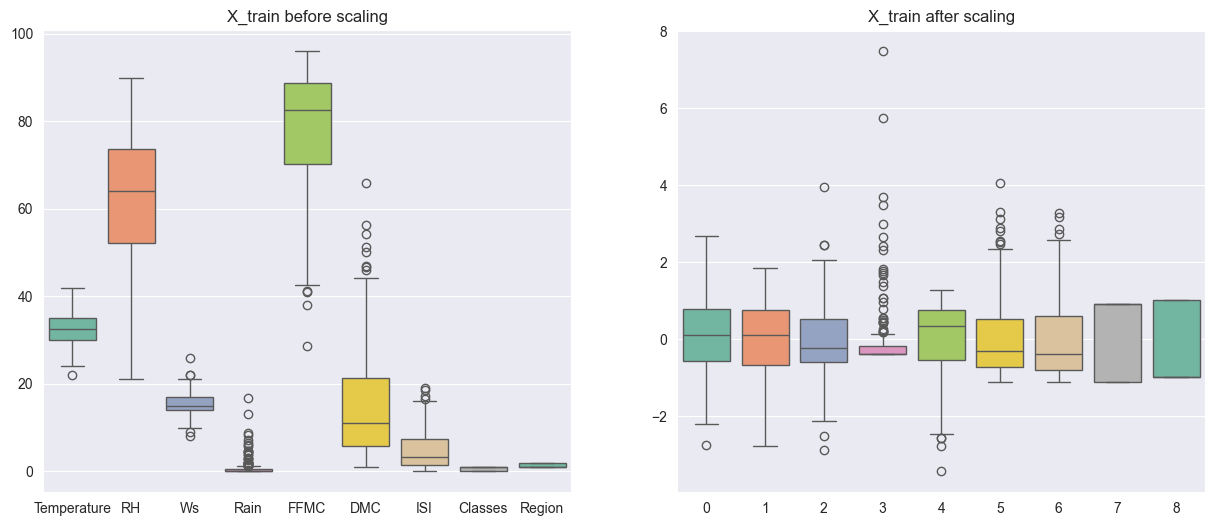

In [71]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.boxplot(X_train,palette='Set2')
plt.title('X_train before scaling')
plt.subplot(122)
sns.boxplot(X_train_scaled , palette='Set2')
plt.title('X_train after scaling')

# Linear Regression Model

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
liner_regression = LinearRegression()
liner_regression.fit(X_train_scaled,y_train)
y_pred = liner_regression.predict(X_test_scaled)
mse = mean_squared_error(y_test , y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("Accuracy:",score*100)

Mean Squared Error: 0.674276687379158
Mean Absolute Error: 0.5468236465249978
Accuracy: 98.47657384266951


# Lasso Regression

In [73]:
from sklearn.linear_model import Lasso
lasso_regression = Lasso()
lasso_regression.fit(X_train_scaled,y_train)
y_pred_lasso = lasso_regression.predict(X_test_scaled)
mae_lasso = mean_absolute_error(y_test,y_pred_lasso)
score_lasso = r2_score(y_test,y_pred_lasso)
print("Mean Absolute Error from lasso regression:",mae_lasso)
print("Accuracy from lasso regression:",score_lasso*100)

Mean Absolute Error from lasso regression: 1.133175994914409
Accuracy from lasso regression: 94.92020263112389


# Ridge Regression

In [74]:
from sklearn.linear_model import Ridge
ridge_regression = Ridge()
ridge_regression.fit(X_train_scaled,y_train)
y_pred_ridge = ridge_regression.predict(X_test_scaled)
mae_ridge = mean_absolute_error(y_test , y_pred_ridge)
score_ridge = r2_score(y_test , y_pred_ridge)
print("Mean Absolute Error from Ridge Regression: ",mae_ridge)
print("Accuracy from Ridge Regression: ",score_ridge*100)

Mean Absolute Error from Ridge Regression:  0.5642305340105715
Accuracy from Ridge Regression:  98.42993364555512


# Elastic Net Regression

In [75]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()
elastic_net.fit(X_train_scaled,y_train)
y_pred_elastic = elastic_net.predict(X_test_scaled)
mae_ridge = mean_absolute_error(y_test,y_pred_elastic)
score_elastic = r2_score(y_test,y_pred_elastic)
print("Mean Absolute Error from ElasticNet Regression: ",mae_ridge)
print("Accuracy from ElasticNet Regression: ",score_elastic*100)

Mean Absolute Error from ElasticNet Regression:  1.8822353634896005
Accuracy from ElasticNet Regression:  87.53460589519703


In [76]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge_regression,open('ridge_regression.pkl','wb'))
